# 问题描述

在03a的基础之上，练习针对线性回归模型进行特征选择


# 数据预处理

## 导入数据

In [1]:
import pandas as pd #导入Pandas
df_sales = pd.read_csv('易速鲜花订单记录.csv') #载入数据
df_sales.head() #显示头几行数据 

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市
0,536374,21258,6/1/2020 9:09,五彩玫瑰五支装,32,10.95,15100,北京
1,536376,22114,6/1/2020 9:32,茉莉花白色25枝,48,3.45,15291,上海
2,536376,21733,6/1/2020 9:32,教师节向日葵3枝尤加利5枝,64,2.55,15291,上海
3,536378,22386,6/1/2020 9:37,百合粉色10花苞,10,1.95,14688,北京
4,536378,85099C,6/1/2020 9:37,橙黄香槟色康乃馨,10,1.95,14688,北京


## 整理日期格式

In [2]:
df_sales = pd.read_csv('易速鲜花订单记录.csv') #载入数据
print('日期范围（格式转化前）: %s ~ %s' % (df_sales['消费日期'].min(), df_sales['消费日期'].max())) #显示日期范围（格式转换前）
df_sales['消费日期'] = pd.to_datetime(df_sales['消费日期']) #转换日期格式
print('日期范围（格式转化后）: %s ~ %s' % (df_sales['消费日期'].min(), df_sales['消费日期'].max()))#显示日期范围

日期范围（格式转化前）: 1/1/2021 10:11 ~ 9/9/2020 9:20
日期范围（格式转化后）: 2020-06-01 09:09:00 ~ 2021-06-09 12:31:00


In [3]:
df_sales = df_sales.loc[df_sales['消费日期'] < '2021-06-01'] #只保留整月数据
print('日期范围（删除不完整的月份）: %s ~ %s' % (df_sales['消费日期'].min(), df_sales['消费日期'].max())) #显示日期范围

日期范围（删除不完整的月份）: 2020-06-01 09:09:00 ~ 2021-05-31 17:39:00


## 数据可视化

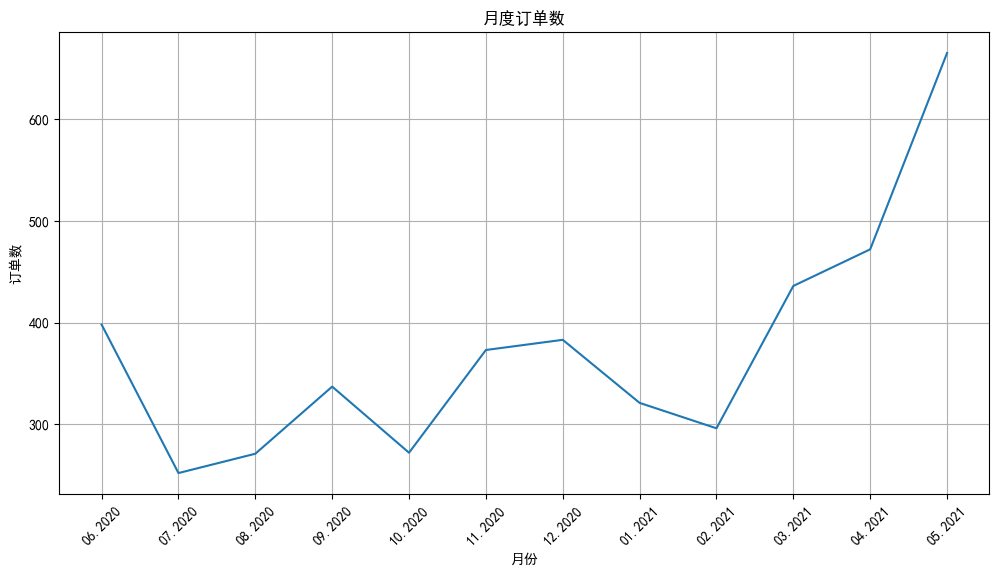

In [4]:
import matplotlib.pyplot as plt #导入Matplotlib的pyplot模块
plt.rcParams['font.family'] = ['SimHei'] #或者 ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
#构建月度的订单数的DataFrame
df_orders_monthly = df_sales.set_index('消费日期')['订单号'].resample('M').nunique()
#设定绘图的画布
ax = pd.DataFrame(df_orders_monthly.values).plot(grid=True,figsize=(12,6),legend=False)
ax.set_xlabel('月份') # X轴label
ax.set_ylabel('订单数') # Y轴Label
ax.set_title('月度订单数') # 图题
#设定X轴月份显示格式
plt.xticks(
    range(len(df_orders_monthly.index)), 
    [x.strftime('%m.%Y') for x in df_orders_monthly.index], 
    rotation=45)
plt.show() # 绘图

## 数据清洗

In [5]:
df_sales = df_sales.drop_duplicates() #删除重复的数据行

## 特征工程

In [6]:
df_sales['总价'] = df_sales['数量'] * df_sales['单价'] #计算每单的总价
df_sales.head() #显示头几行数据  

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市,总价
0,536374,21258,2020-06-01 09:09:00,五彩玫瑰五支装,32,10.95,15100,北京,350.4
1,536376,22114,2020-06-01 09:32:00,茉莉花白色25枝,48,3.45,15291,上海,165.6
2,536376,21733,2020-06-01 09:32:00,教师节向日葵3枝尤加利5枝,64,2.55,15291,上海,163.2
3,536378,22386,2020-06-01 09:37:00,百合粉色10花苞,10,1.95,14688,北京,19.5
4,536378,85099C,2020-06-01 09:37:00,橙黄香槟色康乃馨,10,1.95,14688,北京,19.5


### 构建User用户表

In [7]:
df_sales_3m = df_sales[(df_sales.消费日期 > '2020-06-01') & (df_sales.消费日期 <= '2020-08-30')] #构建仅含头三个月数据的数据集
df_sales_3m.reset_index(drop=True) #重置索引

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市,总价
0,536374,21258,2020-06-01 09:09:00,五彩玫瑰五支装,32,10.95,15100,北京,350.40
1,536376,22114,2020-06-01 09:32:00,茉莉花白色25枝,48,3.45,15291,上海,165.60
2,536376,21733,2020-06-01 09:32:00,教师节向日葵3枝尤加利5枝,64,2.55,15291,上海,163.20
3,536378,22386,2020-06-01 09:37:00,百合粉色10花苞,10,1.95,14688,北京,19.50
4,536378,85099C,2020-06-01 09:37:00,橙黄香槟色康乃馨,10,1.95,14688,北京,19.50
...,...,...,...,...,...,...,...,...,...
14564,545190,22937,2020-08-29 15:32:00,产品说明掩码,6,18.00,15656,苏州,108.00
14565,545190,22722,2020-08-29 15:32:00,产品说明掩码,4,39.50,15656,苏州,158.00
14566,545190,22457,2020-08-29 15:32:00,产品说明掩码,60,3.00,15656,苏州,180.00
14567,545190,22464,2020-08-29 15:32:00,产品说明掩码,12,25.00,15656,苏州,300.00


In [8]:
df_user = pd.DataFrame(df_sales['用户码'].unique()) #生成以用户码为主键的结构
df_user.columns = ['用户码'] #设定字段名
df_user.head() #显示头几行数据
df_R_value = df_sales_3m.groupby('用户码').消费日期.max().reset_index() #找到每个用户的最近消费日期，构建df_R_value对象
df_R_value.columns = ['用户码','最近购买日期'] #设定字段名
df_R_value['R值'] = (df_R_value['最近购买日期'].max() - df_R_value['最近购买日期']).dt.days #计算最新日期与上次消费日期的天数
df_user = pd.merge(df_user, df_R_value[['用户码','R值']], on='用户码') #把上次消费距最新日期的天数（R值）合并至df_user结构
df_F_value = df_sales_3m.groupby('用户码').消费日期.count().reset_index() #计算每个用户消费次数，构建df_F_value对象
df_F_value.columns = ['用户码','F值'] #设定字段名
df_user = pd.merge(df_user, df_F_value[['用户码','F值']], on='用户码') #把消费频率(F值)整合至df_user结构
df_M_value = df_sales_3m.groupby('用户码').总价.sum().reset_index() #计算每个用户三个月消费总额，构建df_M_value对象
df_M_value.columns = ['用户码','M值'] #设定字段名
df_user = pd.merge(df_user, df_M_value, on='用户码') #把消费总额整合至df_user结构
df_user #显示用户表结构

,用户码,R值,F值,M值
0,15100,45,6,635.10
1,15291,35,35,1329.95
2,14688,6,85,1472.28
3,15311,5,715,12711.66
4,15862,89,64,354.23
...,...,...,...,...
365,15951,1,22,375.17
366,14745,1,7,240.60
367,15724,0,5,103.65
368,15874,0,5,584.35


## 构建标签

In [9]:
df_user_1y = df_sales.groupby('用户码')['总价'].sum().reset_index() #计算每个用户整年消费总额，构建df_user_1y对象
df_user_1y.columns = ['用户码','年度LTV'] #设定字段名
df_user_1y.head() #显示头几行数据
df_LTV = pd.merge(df_user, df_user_1y, on='用户码', how='left') #构建整体LTV训练数据集
df_LTV #显示df_LTV

,用户码,R值,F值,M值,年度LTV
0,15100,45,6,635.10,635.10
1,15291,35,35,1329.95,4596.51
2,14688,6,85,1472.28,4449.48
3,15311,5,715,12711.66,58218.04
4,15862,89,64,354.23,659.73
...,...,...,...,...,...
365,15951,1,22,375.17,375.17
366,14745,1,7,240.60,1167.16
367,15724,0,5,103.65,212.30
368,15874,0,5,584.35,4330.67


## 创建特征集和标签集

In [10]:
X = df_LTV.drop(['用户码','年度LTV'],axis=1) #特征集
X.head() #显示特征集

,R值,F值,M值
0,45,6,635.10
1,35,35,1329.95
2,6,85,1472.28
3,5,715,12711.66
4,89,64,354.23


In [11]:
y = df_LTV['年度LTV'] #标签集
y.head() #显示标签集

0      635.10
1     4596.51
2     4449.48
3    58218.04
4      659.73
Name: 年度LTV, dtype: float64

## 拆分训练集、验证集和测试集

In [12]:
from sklearn.model_selection import train_test_split

# 先拆分训练集和其它集
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.7, random_state=36)

# 再把其它集拆分成验证集和测试集
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=36)



# 训练模型

In [13]:
from sklearn.linear_model import LinearRegression #导入线性回归模型
from sklearn.tree import DecisionTreeRegressor #导入决策树回归模型
from sklearn.ensemble import RandomForestRegressor #导入随机森林回归模型
model_lr = LinearRegression() #创建线性回归模型
model_dtr = DecisionTreeRegressor() #创建决策树回归模型
model_rfr = RandomForestRegressor() #创建随机森林回归模型from sklearn.model_selection import train_test_split
# 先拆分训练集和其它集
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7,random_state = 36)
# 再把其它集拆分成验证集和测试集 
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,random_state = 36)

In [14]:
model_lr.fit(X_train, y_train) #拟合线性回归模型
model_dtr.fit(X_train, y_train) #拟合决策树模型
model_rfr.fit(X_train, y_train) #拟合随机森林模型

RandomForestRegressor()

# 评估模型

In [15]:
y_valid_preds_lr = model_lr.predict(X_valid) #用线性回归模型预测验证集
y_valid_preds_dtr = model_dtr.predict(X_valid) #用决策树模型预测验证集
y_valid_preds_rfr = model_rfr.predict(X_valid) #用随机森林模型预测验证集

In [16]:
X_valid.iloc[2] #随便选择一个数据

R值       1.00
F值     153.00
M值    1413.83
Name: 163, dtype: float64

In [17]:
print('真值:', y_valid.iloc[2])  #线性回归模型预测值
print('线性回归预测值:', y_valid_preds_lr[2])  #线性回归模型预测值
print('决策树预测值:', y_valid_preds_dtr[2])  #决策树模型预测值
print('随机森林预测值:', y_valid_preds_rfr[2]) #随机森林模型预测值

真值: 4391.94
线性回归预测值: 7549.228946781502
决策树预测值: 7904.28
随机森林预测值: 4229.162500000002


In [18]:
from sklearn.metrics import r2_score,   median_absolute_error #导入Sklearn评估模块
print('验证集上的R平方分数-线性回归: %0.4f' % r2_score(y_valid, model_lr.predict(X_valid)))
print('验证集上的R平方分数-决策树: %0.4f' % r2_score(y_valid, model_dtr.predict(X_valid)))
print('验证集上的R平方分数-随机森林: %0.4f' % r2_score(y_valid, model_rfr.predict(X_valid)))

验证集上的R平方分数-线性回归: 0.4333
验证集上的R平方分数-决策树: 0.1032
验证集上的R平方分数-随机森林: 0.5258


<div style="text-align:center;">
  <span style="color:red;">从这里开始</span>
</div>

# 特征选择

## 相关性热力图 


在一个数据集中，每个特征在标签预测或分类过程中的作用是不同的。对于那些没有或者作用较小的特征，我们可以删除它们以降低数据维度，并节省模型拟合时的计算空间。这就是特征选择。

那么，如何确定哪个特征具有更大的作用？我将介绍一种常用方法：相关性热力图。以我们上次课程中预测LTV（用户生命周期价值）的数据集为例，该数据集包含3个特征：“R 值”、“F 值”和“M 值”，以及1个标签“LTV”。通过相关性热力图，我们可以看出哪些特征与标签之间具有更高的相关性。


<Axes: >

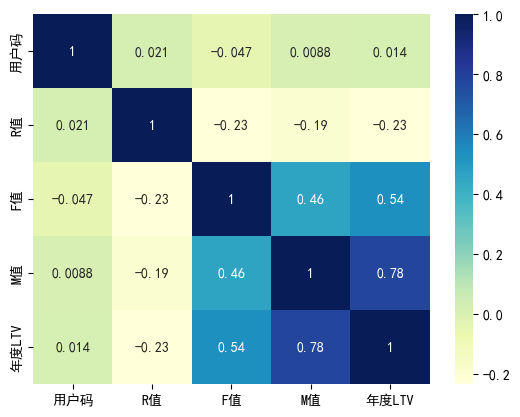

In [19]:
# 对所有的标签和特征两两显示其相关性热力图(heatmap)
import seaborn as sns
sns.heatmap(df_LTV.corr(), cmap="YlGnBu", annot = True)

此代码段使用Seaborn库中的heatmap函数来可视化数据集（具体为`df_LTV`）中特征之间的相关性。热力图提供了一种直观的方式来观察大量相关性数据，便于我们理解特征之间的关联程度和特征与目标变量之间的相关性。

以下是代码段的分步解释：

1. 导入Seaborn库：`import seaborn as sns`

2. 创建热力图：`sns.heatmap(df_LTV.corr(), cmap="YlGnBu", annot = True)`

   使用`df_LTV.corr()`计算数据集（df_LTV）的相关性矩阵。这是一个对称矩阵，元素表示两个特征之间的相关系数。使用`heatmap()`函数将相关性矩阵可视化为热力图。参数`cmap="YlGnBu"`设置了颜色映射，`annot=True`表示每个单元格上显示相关系数值。

通过观察热力图，我们可以快速看到各个特征之间以及特征与目标变量之间的相关程度。颜色较浅的单元格表示相关性较高（正相关或负相关），颜色较深的单元格表示相关性较低。这有助于识别影响目标变量的主要特征，从而构建更准确的预测模型。在热力图上观察到的相关性可以与使用`SelectKBest`和`mutual_info_regression`方法选择的最重要特征相互印证。

---

首先，我们只需要关注LTV标签和R、F、M三个特征之间的关系。用户码这个字段与LTV肯定是无关的。

然后，让我们来看一下图中方格里的数字。这些数字被称为皮尔逊相关系数，用于表示两个变量之间的线性相关性。数值越接近1，代表相关性越强。当然，自己和自己的相关性总是1。

接下来要注意的是，相关性可以有正负之分。正值表示正向相关，负值表示负向相关。从图中可以看出，R值与年度LTV呈现`-0.23`的负相关性。这意味着在数据集中新进度（R）数字越大，则年度LTV越小。你可以思考一下其中原因。

此外，我们还发现M值、F值和LTV之间存在较高的相关性，而R值与LTV之间的相关性较低。因此，我们可以选择舍弃“R值”这个字段，这就是特征选择。

## 手工抛弃掉一个特征R值

In [20]:
X_train_less_feature = X_train.drop(['R值'], axis=1) #特征训练集
X_valid_less_feature = X_valid.drop(['R值'], axis=1) #特征验证集
model_lr_less_feature = LinearRegression() #创建线性回归模型
model_lr_less_feature.fit(X_train_less_feature, y_train) #拟合线性回归模型
print('测试集上的R平方分数-线性回归: %0.4f' % r2_score(y_valid, model_lr.predict(X_valid)))
print('测试集上的R平方分数-少R值特征的线性回归: %0.4f' % r2_score(y_valid, model_lr_less_feature.predict(X_valid_less_feature)))

测试集上的R平方分数-线性回归: 0.4333
测试集上的R平方分数-少R值特征的线性回归: 0.4284


这段代码首先删除了名为"R值"的特征列，在训练集（`X_train`）和验证集（`X_valid`）上创建了新的数据集`X_train_less_feature`和`X_valid_less_feature`。删除这个特征的目的可能是为了检查去除该特征后，对模型性能有何影响。

接下来，定义了一个线性回归模型`model_lr_less_feature`，并使用不包含"R值"特征的训练集（`X_train_less_feature`）和相应的目标值（`y_train`）来拟合这个模型。
```python
model_lr_less_feature = LinearRegression()
model_lr_less_feature.fit(X_train_less_feature, y_train)
```

最后，将这个模型的性能（不含"R值"特征）与原有模型（包含所有特征）的性能进行比较。为此，我们使用R²分数作为评估指标。使用`r2_score`函数，分别计算原有模型（`model_lr`）和修改后的模型（`model_lr_less_feature`）在验证集上的R²分数，并打印结果。
```python
print('测试集上的R平方分数-线性回归: %0.4f' % r2_score(y_valid, model_lr.predict(X_valid)))
print('测试集上的R平方分数-少R值特征的线性回归: %0.4f' % r2_score(y_valid, model_lr_less_feature.predict(X_valid_less_feature)))
```

输出的结果将展示两个模型的性能对比，有助于理解"R值"特征对线性回归模型的影响。注意，这里提到的测试集实际上是指验证集，因为我们是用验证集（`X_valid`和`X_valid_less_feature`）来比较两个模型的性能。所提到的测试集仅是代码注释中的错误。

输出结果显示了两个模型在验证集上的R²分数：

1. 包含所有特征的线性回归模型（model_lr）的R²分数：0.4333
2. 去除“R值”特征后的线性回归模型（model_lr_less_feature）的R²分数：0.4284

R²分数表示解释变量对因变量的解释程度，在0到1之间，值越接近1则表示模型解释程度越高。根据你给出的结果，两个模型的性能相差不大，包含所有特征的模型的分数稍高一点。

从这个结果可以得出以下观察：

- 删除“R值”特征并没有导致模型性能的显著降低。这说明在你的数据集中，使用全部特征和不使用“R值”特征训练的模型在预测能力上几乎没有太大差别。
- 尽管包含所有特征的线性回归模型在预测性能上略优于不包含“R值”特征的模型，但两者之间的差距很小。因此，在实际应用中，可以根据需求权衡考虑保留或去除这个特征。例如，如果在保留或去除这个特征对其他方面没有影响，那么可能会选择保留这个特征以获得更高的预测性能。

总之，这两个模型在验证集上的性能差别不大。去除“R值”特征后，模型性能略有下降。你可以根据具体应用场景和需求来决定是否保留这个特征。

## 用SelectKBest自动选择特征

我们使用了“相关性热力图”来观察每个特征和标签之间的关系，并手动选择了特征。也许你会问，是否有工具可以自动进行特征选择呢。

在sklearn的feature_selection模块中，提供了许多自动特征选择工具。我将介绍一个常用的单变量特征选择工具——SelectKBest。SelectKBest的原理和使用非常简单：它对每个特征和标签之间进行统计检验，根据X和y之间的相关性统计结果来选择最好的K个特征，并返回。

In [21]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression  #导入特征选择工具
selector = SelectKBest(mutual_info_regression, k = 2) #选择最重要的两个特征
selector.fit(X, y) #用特征选择模型拟合数据集
X.columns[selector.get_support()] #输出选中的两个特征

Index(['F值', 'M值'], dtype='object')

这段代码主要用于从数据集中选择最重要的两个特征。以下是每步操作的详细说明：

1. 导入特征选择工具：`from sklearn.feature_selection import SelectKBest, mutual_info_regression`

   这一行代码引入了两个重要的库：`SelectKBest`和`mutual_info_regression`。`SelectKBest`是一个特征选择算法，它从特征集合中选择指定数量（即k个）的最重要特征。`mutual_info_regression`是一个评估特征重要性的函数，它度量了特征和目标之间的互信息。

2. 初始化`SelectKBest`对象：`selector = SelectKBest(mutual_info_regression, k = 2)`   

   这行代码创建了一个`SelectKBest`对象，并使用`mutual_info_regression`作为特征选取的标准，设置参数k=2，表示从特征集合中选择最重要的两个特征。

3. 拟合数据集：`selector.fit(X, y)`  

   使用输入的特征集（`X`）和目标值（`y`）训练`selector`对象，计算各个特征与目标之间的互信息。

4. 输出选中的特征：`X.columns[selector.get_support()]` 

   在经过`fit`函数计算之后，可以使用`get_support()`方法获取一个布尔类型的数组，表示每个特征是否被选中。通过在原特征集`X`的列名称上应用该布尔数组，可以输出被选中的两个最重要特征的名称。

最终，该段代码将输出互信息最高的两个特征名称，可以用这两个特征来训练和验证模型，评估在仅基于这两个特征时模型的性能。

上述代码的输出表示，在使用SelectKBest方法和mutual_info_regression准则对特征进行排序后，被选中的两个最重要特征分别为 'F值' 和 'M值'。

这意味着在所有输入特征中，'F值' 和 'M值' 与目标变量之间的相关性最高。换句话说，这两个特征对目标变量的预测具有最大的信息量。如果采用只包含这两个特征的简化模型，模型可能在某种程度上保持相对较高的性能。

你可以尝试使用这两个特征构建一个新的线性回归模型，并在训练集和测试集上评估该模型的性能。这样，你可以比较仅使用这两个特征的模型与之前使用所有特征（包括或不包括“R值”特征）的模型之间的性能差异。如果仅使用这两个特征的模型性能足够好，可以考虑采用该简化模型来减少计算成本和提高解释性。